# K-means e hierarchical clustering

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
import warnings
warnings.filterwarnings('ignore')

In [1]:
sns.pairplot(data.dropna(), size=4, kind='scatter')

NameError: name 'sns' is not defined

<Axes: >

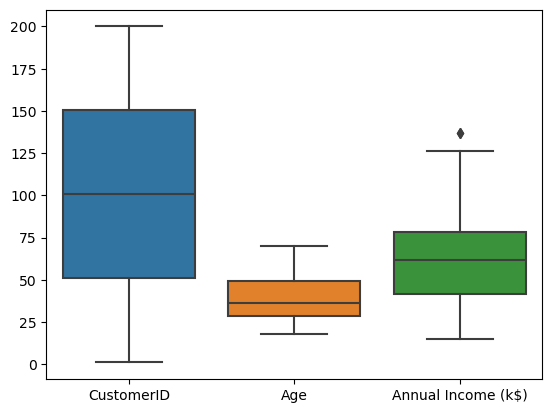

In [67]:
sns.boxplot(data=data)

# K-MEANS

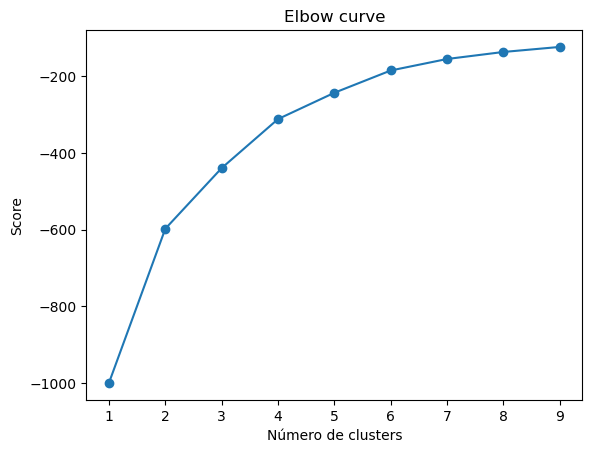

In [74]:
Nc= range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score, marker='o',color='red')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Elbow curve')
plt.show()

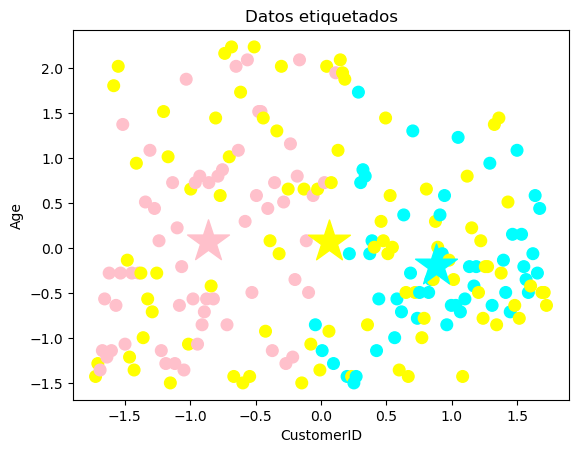

In [84]:
f1 = X['CustomerID'].values
f2 = X['Age'].values
plt.scatter(f1,f2, c='blue', s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

# Hierarchical clustering

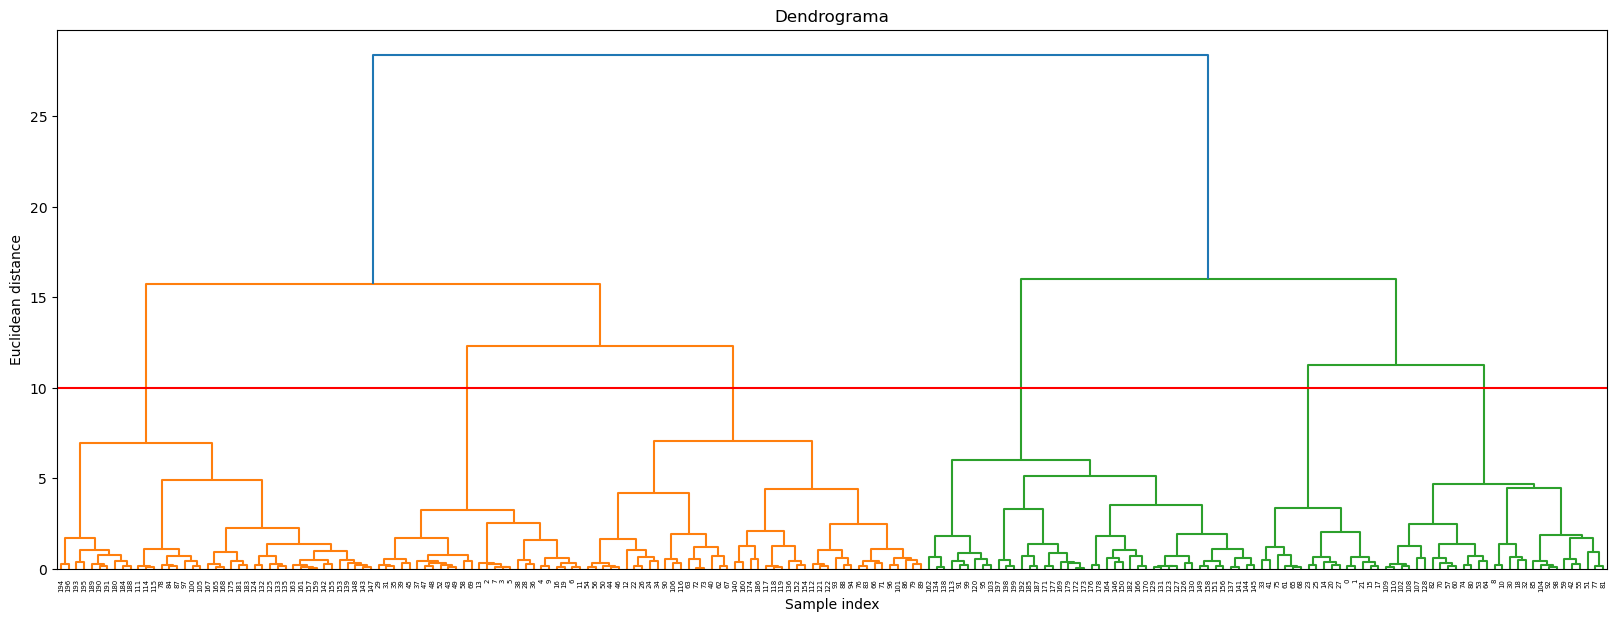

In [87]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram (ward_clustering)
plt.axhline(y = 10, color = 'blue', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

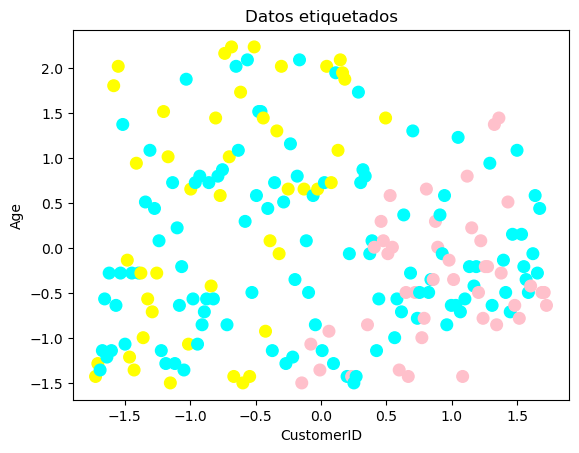

In [90]:
f1 = X['CustomerID'].values
f2 = X['Age'].values
plt.scatter(f1,f2, c='blue', s=70)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

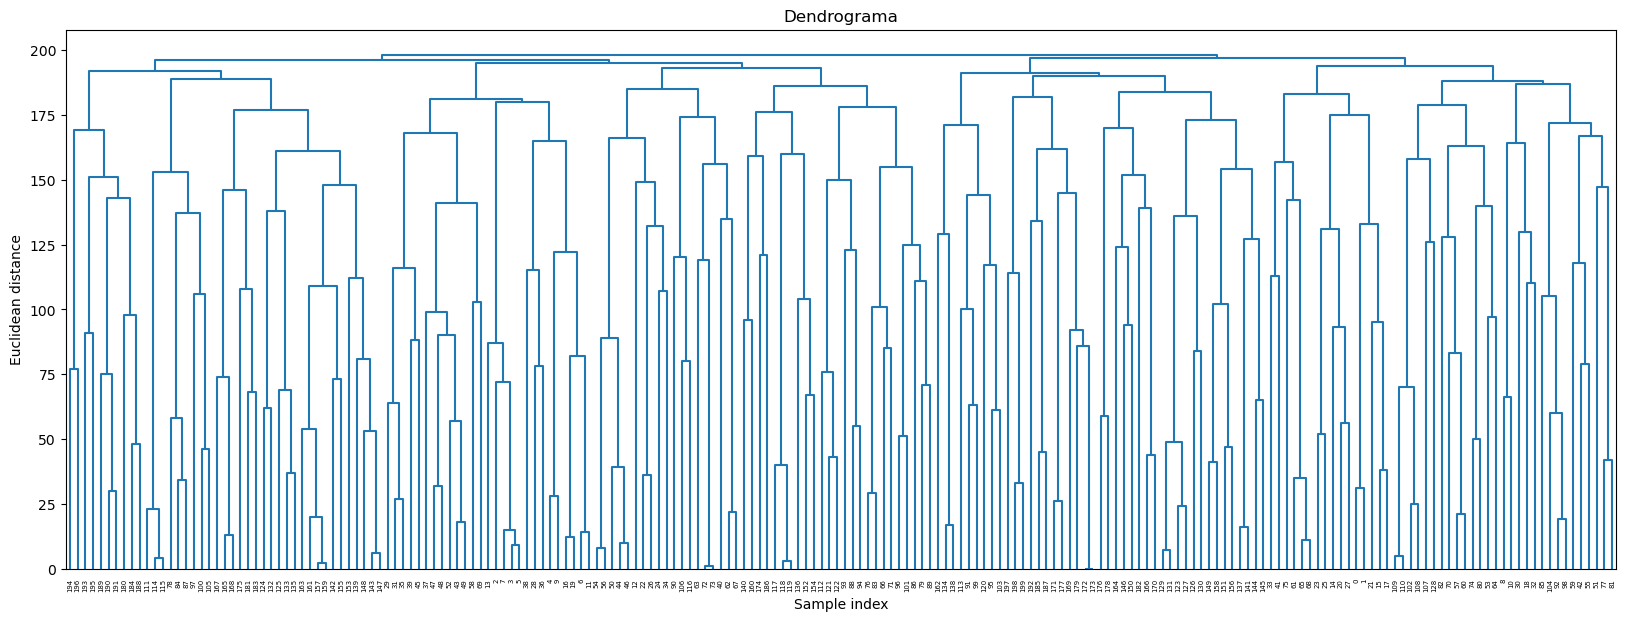

In [96]:
plot_dendrogram(hier_clustering, color_threshold=0,line_color='green')

Text(0, 0.5, 'Media índices silhouette')

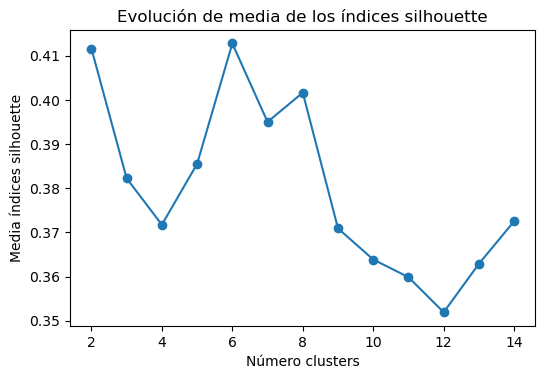

In [100]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        affinity = 'euclidean',
        linkage = 'ward',
        n_clusters = n_clusters
    )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')